In [13]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 16 11:28:04 2019

@author: Stan
"""

import numpy
from keras.models import model_from_json
from keras.datasets import mnist
# Утилиты для работы с массивами
from keras.utils import np_utils
# Пакет для обработки пикчей
from PIL import Image

# Загружаем данные об архитектуре сети из файла json
json_filename = "mnist_model.json"
with open(json_filename, "r") as json_file:
    loaded_model_json = json_file.read()

# Создаем модель на основе загруженных данных
model = model_from_json(loaded_model_json)

# Загружаем веса в модель
h5_filename = "mnist_model.h5"
model.load_weights(h5_filename)

# Перед использованием загруженной нейронной сети необходимо её скомпилировать
model.compile(loss="categorical_crossentropy", optimizer="SGD", 
              metrics=["accuracy"])

# Вывести начальные характеристики нейросети
print(model.summary())

#%%
# Данные для тестирования загруженной нейронной сети
_, (x_test, y_test) = mnist.load_data()
X_test = x_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = np_utils.to_categorical(y_test, 10)

# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных : %.2f%%" % (scores[1] * 100))

#%%
# Загрузка чёрно-белого изображения 28х28, на котором изображена цифра
pic_name = "3_1.png"
img = Image.open(pic_name)

# Преобразование этой картинки в массив нужной размерности согласно её RGB 
# схеме (белый пиксель - это (255, 255, 255), чёрный - (0, 0, 0)). Для 
# изображения png размерность этого массива составит (28, 28, 3)
arr = numpy.array(img)

# Составление нового массива размерности (1, 784) (тут уже 0 - это белый цвет, 
# 255 - чёрный)
img.show()
new_arr = numpy.array([
        [255 - pixel for row in arr for pixel in row]
        ], 'float32')
    
# Нормировка данных
new_arr /= 255

# Работа загруженной нейронной сети со сформированным массивом пикселей
result = model.predict(new_arr)
for i, perc in enumerate(numpy.round(100 * result)[0]):
    print(f"{i}: {perc}")
print(f"result = {numpy.argmax(result)}")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None
Точность работы на тестовых данных : 95.87%
0: 0.0
1: 0.0
2: 0.0
3: 0.0
4: 0.0
5: 100.0
6: 0.0
7: 0.0
8: 0.0
9: 0.0
result = 5


In [3]:
from skimage.io import imshow
%matplotlib inline

(28, 28)

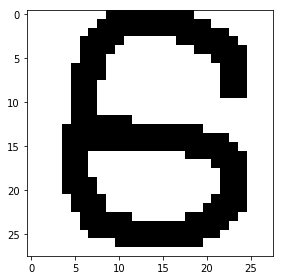

In [7]:
imshow(arr)
arr.shape